<div align ="right">Thomas Jefferson University <b>COMP 104</b>: Intro to Big Data</div>

# Correlation and Regression


Let's start with a very simple example. We can use the `stats` module within the `scipy` library to do basic statistics. So let's add that to our standard import list. 


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats      #short name, no nickname needed


## Correlation
From the data folder import `AvgTemp.csv` into a pandas dataframe named `AvgTemp` and display the data header:

In [55]:
# Import the data set and convert it to a pandas dataframe AveTemp, check the import by displaying the 'head'

AvgTemp= pd.read_csv(r'C:\Users\renie\Downloads\3_Regression\3_Regression\data\AvgTemp.csv')

print(AvgTemp)
AvgTemp.head()


     year  AvgTemp
0    1887     -7.5
1    1888     -6.8
2    1889     -7.1
3    1890     -7.0
4    1891     -6.7
5    1892     -6.4
6    1893     -6.7
7    1894     -6.3
8    1895     -6.7
9    1896     -6.7
10   1897     -6.0
11   1898     -5.4
12   1899     -6.1
13   1900     -5.9
14   1901     -7.2
15   1902     -6.3
16   1903     -6.2
17   1904     -5.9
18   1905     -6.7
19   1906     -6.4
20   1907     -6.7
21   1908     -7.1
22   1909     -7.8
23   1910     -7.0
24   1911     -6.0
25   1912     -6.9
26   1913     -6.5
27   1914     -6.3
28   1915     -7.1
29   1916     -6.2
..    ...      ...
92   1979     -5.9
93   1980     -6.4
94   1981     -6.3
95   1982     -5.1
96   1983     -4.9
97   1984     -6.4
98   1985     -5.8
99   1986     -5.3
100  1987     -5.7
101  1988     -5.5
102  1989     -4.5
103  1990     -4.8
104  1991     -5.5
105  1992     -4.5
106  1993     -5.2
107  1994     -4.4
108  1995     -5.6
109  1996     -5.9
110  1997     -5.1
111  1998     -5.0
112  1999   

,year,AvgTemp
0,1887,-7.5
1,1888,-6.8
2,1889,-7.1
3,1890,-7.0
4,1891,-6.7


To run a correlation analysis within scipy.stats we use the incredibly simple format
```
stats.pearsonr(x,y)
```
"Pearson's r" is of course the correlation coefficient *r*. Try it yourself. Note that since a correlation analysis is about the co-variance between variables, it doesn't matter which value we use for x and which value we use for y. Try running it both ways and printing the results to prove that it is the same. 

In [56]:
#run and print the results of the correlation twice, using each variable as x and y
x= AvgTemp['year']
y= AvgTemp['AvgTemp']

#x= 'year'
#y= ('AvgTemp')

stats.pearsonr(x,y)

a= AvgTemp['AvgTemp']
b= AvgTemp['year']

stats.pearsonr(a,b)

#x=np.array



(0.6388445026294715, 2.42632074990794e-15)

Ok, so now we come to something that is going to come up a lot with statistical analyses. What do these outputs means and how do we interpret them? Luckily for us, SciPy.org maintains really nice documentation of each of the modules.  <a href = 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html'>The documentation for the `pearsonr` function<> tells us that the two numbers we are seeing are the correlation coefficient *r* and the *p-value*, respectively. Don't worry about what the p value means for now, we will get to that. The data is stored as a <a href='https://www.w3schools.com/python/python_sets.asp'>tuple</a>, in which a single variable name is used to store multiple pieces of data. As you can see at 'Next' page at the link, 'Access Tuples', tuples can be indexed just like a list. In the next code window assign the results of the pearsonr function to a variable `results`, and then use that tuple to print out the following output.
    
```
r=  0.6388445026294715
p-value =  2.42632074990794e-15
```
    
    

In [57]:
# Generate your ouput of the correlation results here
x= AvgTemp['year']
y= AvgTemp['AvgTemp']

thistuple = (stats.pearsonr(x,y))

print ("r=", thistuple[0])

print("p-value=", thistuple[1])


r= 0.6388445026294715
p-value= 2.42632074990794e-15


Now create a scatterplot for the dataset. Label the axes, and place the text you generated in an appropriate location on the image. Ta-dah! You've done your first correlation analysis. 

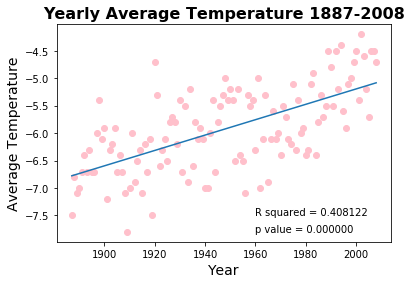

In [58]:
#Make your scatterplot here. 
x= AvgTemp['year']
y= AvgTemp['AvgTemp']
plt.plot (x, y, "o", color = 'pink')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot (x,line)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Average Temperature', fontsize= 14)
plt.title ('Yearly Average Temperature 1887-2008', fontsize= 16, fontweight= 'bold')
plt.text(1960, -7.5, ('R squared = %f'% r_value**2), fontsize= 10)
plt.text(1960, -7.8, ('p value = %f'% p_value), fontsize= 10)
plt.show ()


## Regression

As you learned in the reading, correlation and regression are similar but different. Whereas correlation is about measuring the strength of association between two variables, regression is about building a model from which we can predict the value of a dependent variable *y* from the value of an indepdendent or predictor variable *x*. 

We will use the same data that we used above, as it's appropriate for regression analysis. For regression, it is in fact really important to keep our dependent and independent variables in the right order. In this example, we are trying to predict how temperature changes with year, so year is the x value.
```
stats.linregress(x,y)
```

In [62]:
# Run the linear regression here
x= AvgTemp['year']
y= AvgTemp['AvgTemp']
stats.linregress(x,y)



LinregressResult(slope=0.01399374134643663, intercept=-33.18395881316894, rvalue=0.6388445026294712, pvalue=2.4263207499079685e-15, stderr=0.001538381493118527)

Note that the output is something different! If we consult <a href = 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html'>the SciPy documentation for lingregress</a> we see that it returns an *object*. You can google what this means, it's kind of deep, but it's similar to how we created plot objects with matplot lib. Functionally for us it means that our result has a lot of different named characteristics that are useful to us. 

Try the following. As you did above with the correlation, use a variable called results to store the results of the linear regression. This time, we will call from results using the names of the different elements in the object, like this `results.rvalue`. Use this to report the results of the regression. Your result should look like this
```
R^2 =  0.40812229853989646
r =  0.6388445026294712
slope =  0.01399374134643663
intercept =  -33.18395881316894
```

In [65]:
# Generate your ouput of the correlation results here
x= AvgTemp['year']
y= AvgTemp['AvgTemp']

mytuple = (stats.linregress(x,y))

#results.rvalue
print("R^2 =", mytuple[2]**2)
print("r =", mytuple[2])
print("slope =", mytuple[0])
print("intercept =", mytuple[1])

#all the above boxes would not have been possible
#without the help of Amber
#give her a medal


R^2 = 0.40812229853989646
r = 0.6388445026294712
slope = 0.01399374134643663
intercept = -33.18395881316894


Note that the R^2 of a regression analysis is literally the *r* value of a correlation analysis squared. 

With a regression analysis, one thing we are doing is determining the equation of the line that best fits the data, in the sense that it minimizes the squared distance of the y values from that line. These values are reported as the slope and intercept. You should be able to create a line from the slope and intercept, plugging these values into your classic `y = mx + b ` equation for a line. 

For the final activity create a scatter plot of the data again, but this time add a regression line and annotate with the values from the regression, particularly R^2, and the slope and intercept of the line. 

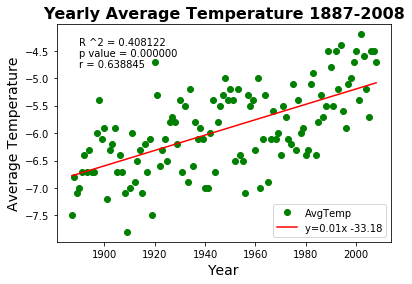

In [85]:
# Create your graph here
#plt.plot(x,y, 'x', )
x= AvgTemp['year']
y= AvgTemp['AvgTemp']
plt.plot (x, y, "o", color = 'green')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept
plt.plot (x,line,'r', label= 'y={:.2f}x {:.2f}'.format(slope,intercept))
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Average Temperature', fontsize= 14)
plt.title ('Yearly Average Temperature 1887-2008', fontsize= 16, fontweight= 'bold')
plt.text(1890, -4.4, ('R ^2 = %f'% r_value**2), fontsize= 10)
plt.text(1890, -4.6, ('p value = %f'% p_value), fontsize= 10)
plt.text(1890, -4.8, ('r = %f'% r_value), fontsize=10)
#plt.text(1890, -4.7, ('y = %f'%slope), fontsize=10)
plt.legend()
plt.show ()

#plt.text(1890, -4, ('r = %f'% r_value), fontsize=10)
#"r =", mytuple[2])
#print("slope =", mytuple[0])
#print("intercept =", mytuple[1])

#in conclusion, I couldn't have made it this far without the homies and Amber


![Alt text that will appear on mouseover](images/TJU_logo_image.png "TJU logo image")